# Exercises in Data Transformation and Exploratory Data Analysis

This notebook contains the exercises for the class of February 5, 2025, in the course Data & Things at Roskilde University.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 3

Do an exploratory data analysis of the adult dataset. The cell below loads the dataset from UCI Machine Learning Repository into a pandas dataframe called `adult_data`. It requires that you have installed the package `ucimlrepo`. (Otherwise the dataset is on model for this class.)

 You need to explain what the data is about,
which variables the dataset contains and what their data type is. Moreover, for each
individual variable you should investigate/explain its distribution/variation through
visualization and descriptive statistics. 

Finally, you should investigate/explain the
variation/correlation between pairs of variables – here it is enough to investigate three
pairs of variables, one where both variables are categorical, one where both variables
are numeric, and one where one of the variable is categorical and the other is numeric.

In [8]:
from ucimlrepo import fetch_ucirepo 
adult = fetch_ucirepo(id=2) 
X = adult.data.features 
y = adult.data.targets
X["income"] = y
adult_data = X.copy()

adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [9]:
# I had to clean income values, because some entries have a "." while others do not.
# income values should be either ">50K" or "<=50K". Before cleaning there was bug with :['<=50K', '>50K', '<=50K.', '>50K.'] 
adult_data['income'] = adult_data['income'].str.replace('.', '', regex=False)

### Explain what the data is about
<li>Explain what the data is about</li>
<p> The data is demographic information about people and if their income is above or bellow 50000 dollers a year.
<br>This allow us to predict if a person earns >50K or <=50k. This is predicted based on attributes like age, education, occupation and so on.
</p><hr>
<li>Explain variables</li>
<p>The dataset contains 15 total column and have 48842 entries (rows).
<br>Categorical values include: (workclass, education, marital-status, occupation, relationship, race, native-country).
<br>Numeric values include: (age, fnlwgt, education-num, capital-gain, capital-loss, hour-per-week).
<br>Boolean values unclude: (sex, income).</p>
<p>All numeric valeus are int64. <br>While categories and booleans are objects (strings).</p><hr>


### Investigate/explain the variation/correlation between pairs of variables
<li>Education vs Hours-per-week</li> 
<p> From the boxplot, most education levels show a median workweek close to 40 hours. Higher education levels like Doctorate and Prof-School tend to have a slightly higher median and a tighter interquartile range. But overall the variation between education levels is not massive. There are plenty of outliers across all education levels, especially people working 60–100 hours, but that seems spread across all groups. The exception would be 10th, 11th ,12th categories, where people often work less hours. In general it seems there's a slight tindendency that lower the education, the less people work
</p> 
<li>Age vs Hours-per-week</li> 
<p> The scatterplot shows that most people work between 30–50 hours regardless of age. There isn’t a clear linear correlation between age and hours-per-week, but younger workers (under 20) and older workers (over 65) show more variation and fewer entries. The hexbin plot confirms that most workers (across all ages) cluster around 40 hours per week. 
</p> 
<li>Gender vs Income</li> 
<p> The bar chart shows that men are more represented in the >50K income bracket. While women have significantly fewer entries above 50K compared to men. This highlights a noticeable income gap by gender. But most people from either gender earn are >50k 
</p> 
<li>Race vs Income</li> 
<p> The percentage bar chart shows that White and Asian-Pac-Islander have the highest share of >50K income, while other races have a smaller proportion of higher-income individuals. Most races still fall into the <=50K bracket overall. But the distribution of >50K is not uniform.
</p> <hr>



In [10]:
# How I found which variables the dataset contains.
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
# How I found what their data type is.
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [12]:
# Here I am checking the unique values in the categorical columns.
adult_data.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,47879,48842,48842,47876,48842,48842,48842,48568,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [13]:
# Here I am printing the unique values in each categorical column.
for column in ['workclass', 'education', 'relationship','marital-status', 'occupation','race', 'native-country','sex', 'income']:
    print(f"Unique values in {column}:")
    print(adult_data[column].unique().tolist())
    print()


Unique values in workclass:
['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked', nan]

Unique values in education:
['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th']

Unique values in relationship:
['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']

Unique values in marital-status:
['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']

Unique values in occupation:
['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', '?', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv', nan]

Unique values in race:
['White', 'Black', 'Asian-Pac-Islander', 'Amer-In

In [ ]:
#Exploring
adult_data.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,47879,4.884200e+04,48842,48842.000000,48842,47876,48842,48842,48842,48842.000000,48842.000000,48842.000000,48568,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [ ]:
def make_percent(values): # Function to make a DataFrame with counts and percentages
    counts = values.value_counts()
    percentages = values.value_counts(normalize=True) * 100
    return pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})

# Some extra exploration. Printing the avarage age and the distribution of workclass.
print("Average age:", adult_data['age'].mean())
print(make_percent(adult_data['workclass']))



Average age: 38.64358543876172
                  Count  Percentage
workclass                          
Private           33906       70.82
Self-emp-not-inc   3862        8.07
Local-gov          3136        6.55
State-gov          1981        4.14
?                  1836        3.83
Self-emp-inc       1695        3.54
Federal-gov        1432        2.99
Without-pay          21        0.04
Never-worked         10        0.02


<h3> Here I vizualize the Age distribution </h>

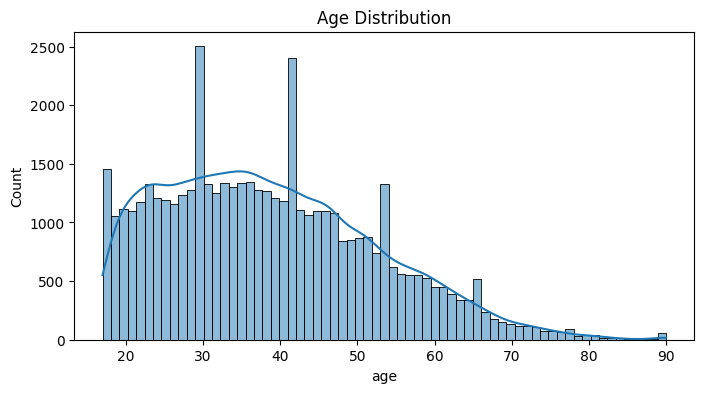

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns




# Income relating to age

# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(adult_data['age'], kde=True)
plt.title("Age Distribution")
plt.show()

<h3>Here I vizualizethe distribution of Race.</h>

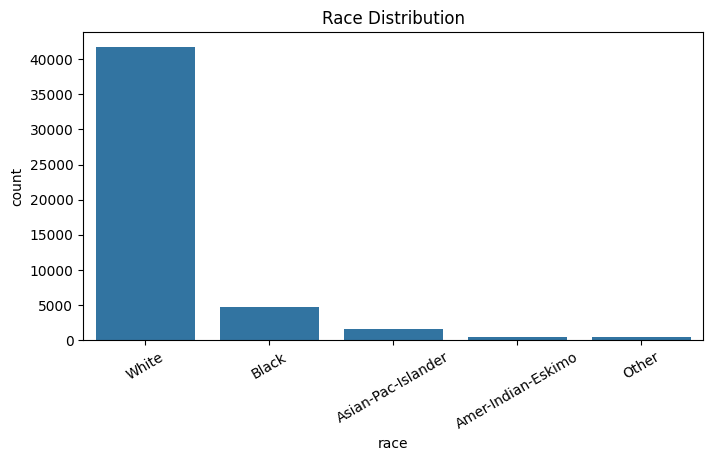

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram for distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='race', data=adult_data, order=adult_data['race'].value_counts().index)
plt.title("Race Distribution")
plt.xticks(rotation=30)
plt.show()

<h3>Below I vizualize Gender distribution </h>

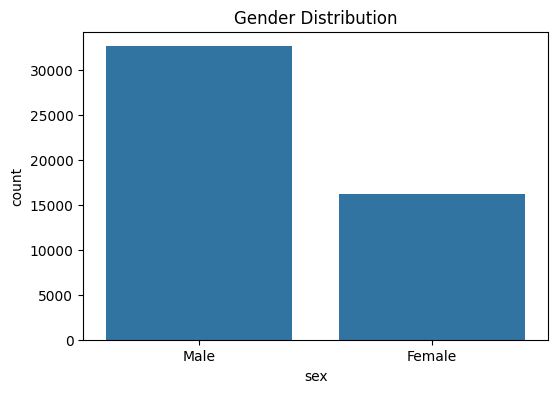

In [22]:

# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=adult_data)
plt.title("Gender Distribution")
plt.show()


## Analyze variable pairs and their correlation
<h3> Categorical vs categorical - Workclass vs Gender</h>

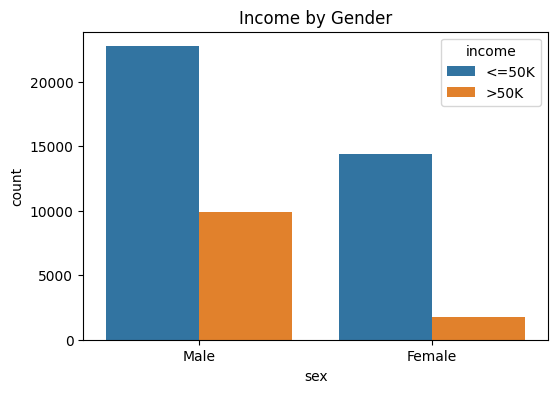

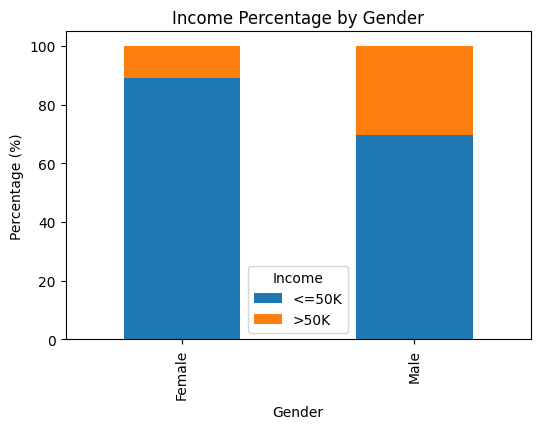

In [23]:
# Income by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='income', data=adult_data)
plt.title("Income by Gender")
plt.show()

# Percentage of Income by Gender
gender_income_pct = pd.crosstab(adult_data['sex'], adult_data['income'], normalize='index') * 100
gender_income_pct.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title("Income Percentage by Gender")
plt.ylabel("Percentage (%)")
plt.xlabel("Gender")
plt.legend(title="Income")
plt.show()

<h3> Categorical vs categorical - Workclass vs Race</h>

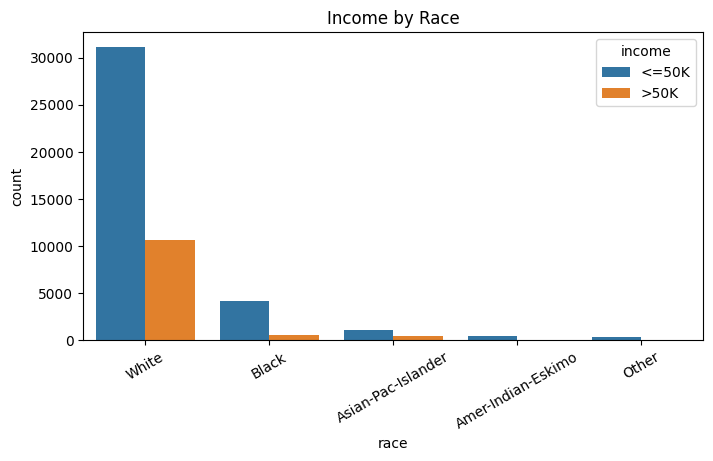

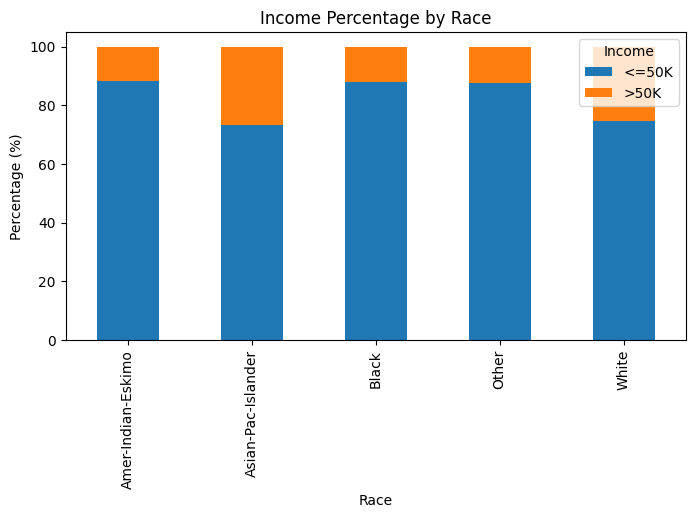

In [27]:
# Count plot - Income by Race
plt.figure(figsize=(8, 4))
sns.countplot(x='race', hue='income', data=adult_data, order=adult_data['race'].value_counts().index)
plt.title("Income by Race")
plt.xticks(rotation=30)
plt.show()

# Bar char - percentage of Income by Race
race_income_pct = pd.crosstab(adult_data['race'], adult_data['income'], normalize='index') * 100
race_income_pct.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title("Income Percentage by Race")
plt.ylabel("Percentage (%)")
plt.xlabel("Race")
plt.legend(title="Income")
plt.show()



<h3> Categorical vs categorical - Workclass vs Income </5>

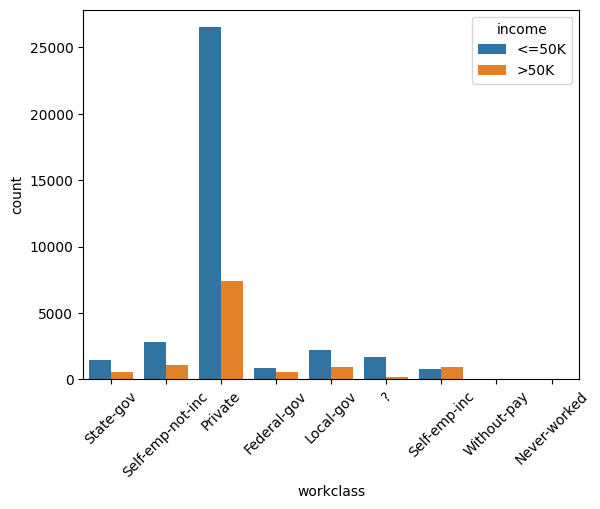

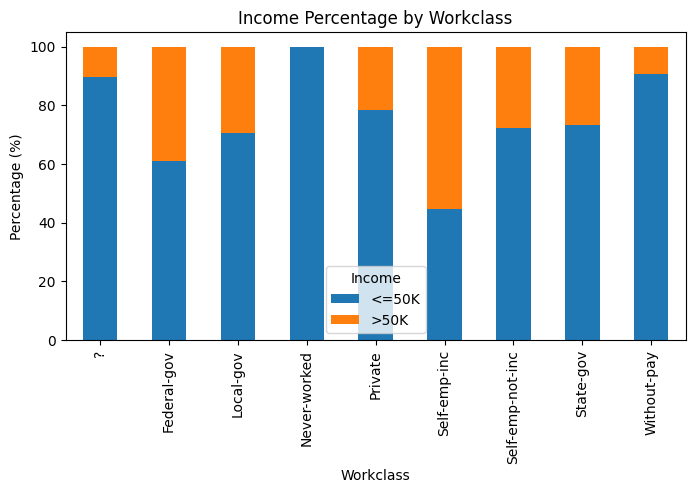

In [28]:
# Count bar - Icome by Workclass
sns.countplot(x='workclass', hue='income', data=adult_data)
plt.xticks(rotation=45)
plt.show()

# Bar char - percentage of Income by Workclass
workclass_income_pct = pd.crosstab(adult_data['workclass'], adult_data['income'], normalize='index') * 100
workclass_income_pct.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title("Income Percentage by Workclass")
plt.ylabel("Percentage (%)")
plt.xlabel("Workclass")
plt.legend(title="Income")
plt.show()


<h3> Numeric vs cagetorical - Age vs Wealth </h>

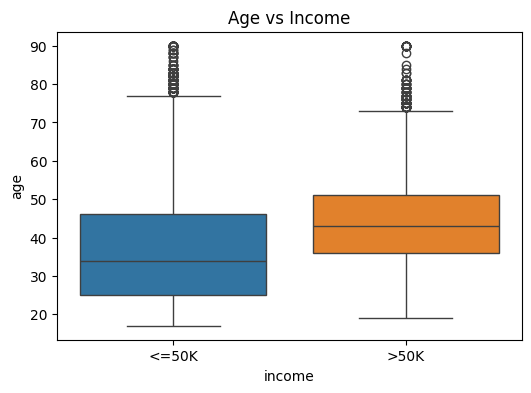

In [36]:
income_palette = {"<=50K": "#1f77b4",">50K": "#ff7f0e"} 

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='income', y='age', data=adult_data, hue='income', palette=income_palette)

plt.title("Age vs Income")
plt.show()


<h3> Numeric vs categorical - Education vs Hours-per-week </h>

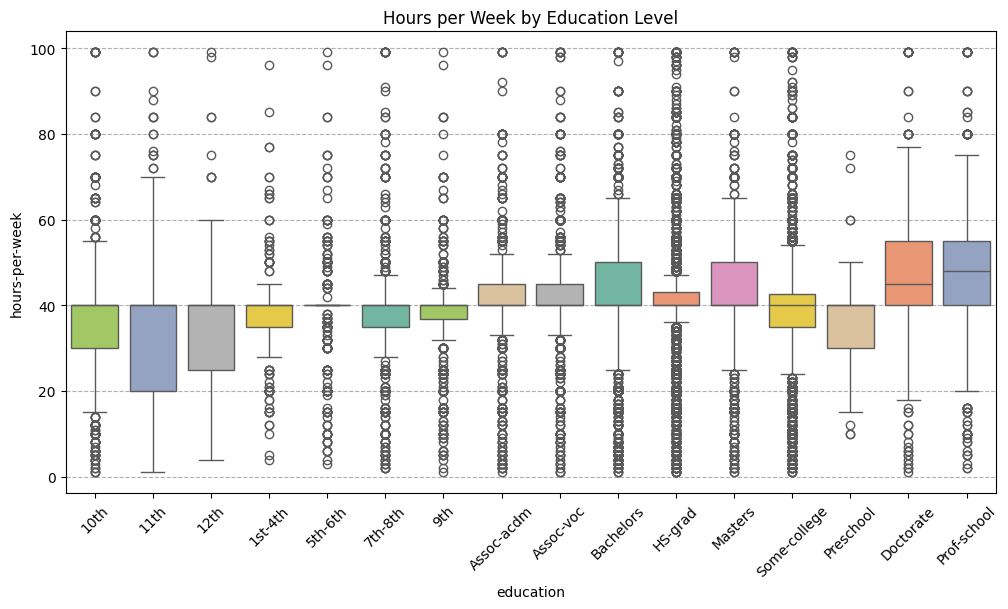

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='education',
    y='hours-per-week',
    data=adult_data,
    hue='education', 
    order=adult_data.groupby('education')['hours-per-week'].median().sort_values().index,
    palette='Set2'
)
plt.xticks(rotation=45)
plt.title("Hours per Week by Education Level")
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()


<h3> Numeric vs numeric - Age vs Hours-per-week </h>

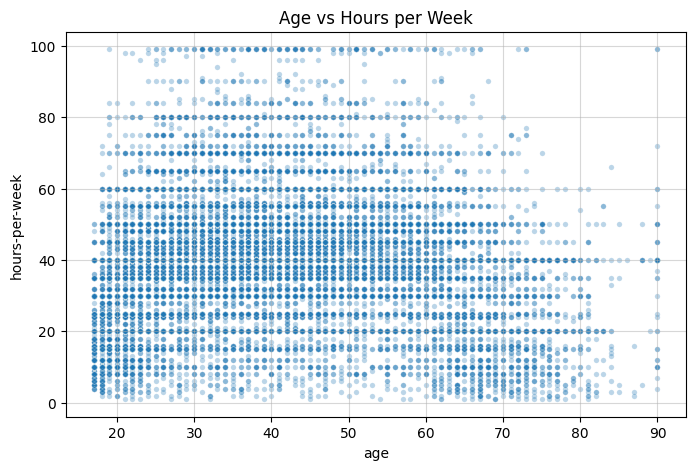

In [ ]:
# Scatter plot - Age vs Hours-per-week
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='age',
    y='hours-per-week',
    data=adult_data,
    alpha=0.3,
    s=15        
)
plt.title("Age vs Hours per Week")
plt.grid(alpha=0.5)
plt.show()



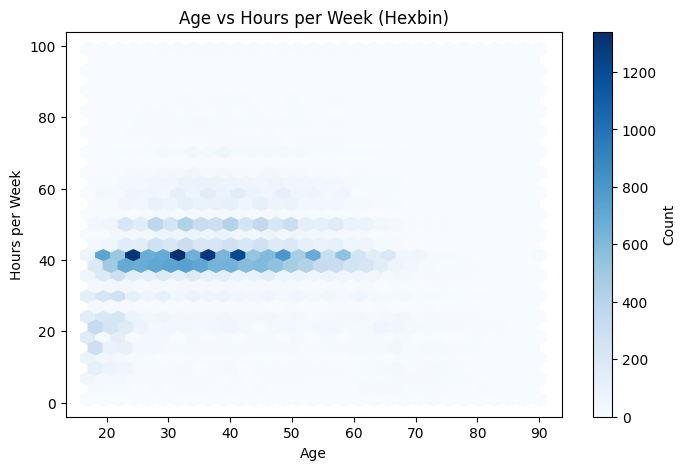

In [51]:
# Hexbin plot - Age vs Hours-per-week
plt.figure(figsize=(8, 5))
plt.hexbin(adult_data['age'], adult_data['hours-per-week'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.title("Age vs Hours per Week (Hexbin)")
plt.show()
